# 2. Lines and Bound

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [2]:
%run 'Color_and_Legends.ipynb'

In [3]:
%run 'Plotting_Tools.ipynb'

In [4]:
%run 'Load_Delay_Data_Frame.ipynb'

The number of delays on each line

Looks like the most delays in number and total length occur on the **Bloor-Danfroth** followed by the **Yonge-University** Lines.

BUT **Scarborough** has the highest average delay length **Sheppard**

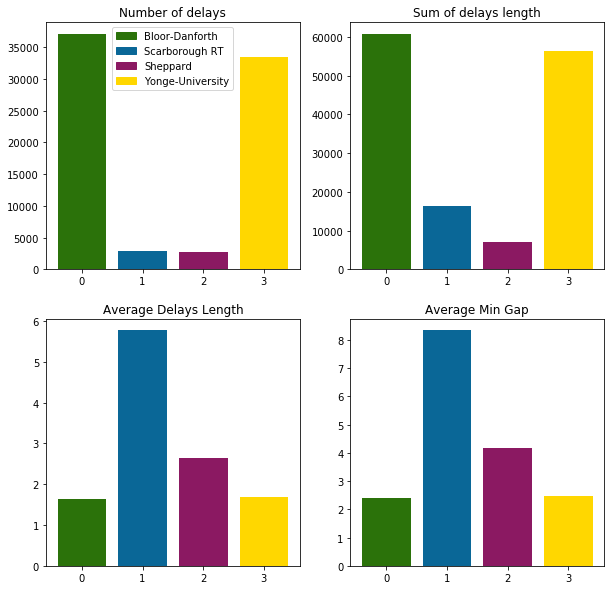

In [5]:
lines = ttc.groupby('Line')
x = np.arange(4)

fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0][0].bar(x,lines.size().values, color=colors)
ax[0][0].set_title('Number of delays')

ax[0][1].bar(x,lines['Min Delay'].sum().values, color=colors)
ax[0][1].set_title('Sum of delays length')

ax[1][0].bar(x,lines['Min Delay'].mean().values, color=colors)
ax[1][0].set_title('Average Delays Length')

ax[1][1].bar(x,lines['Min Gap'].mean().values, color=colors)
ax[1][1].set_title('Average Min Gap')
ax[0][0].legend(handles=line_patches)


plt.show()

### Normalized by the Number of Stations

In [6]:
line_grouping = ttc.groupby('Line')
station_count = line_grouping['Station'].nunique()
delays_per_station = line_grouping.size()/line_grouping['Station'].nunique()
total_delay_per_station = line_grouping['Min Delay'].sum() / station_count

Once we normalize for the number of stations on each line we still see a similar trend but less extreme for the number of stations.

It's also interesting that **Scarborough** has  the longest delays per station dispite having the second least # of dealys per line.

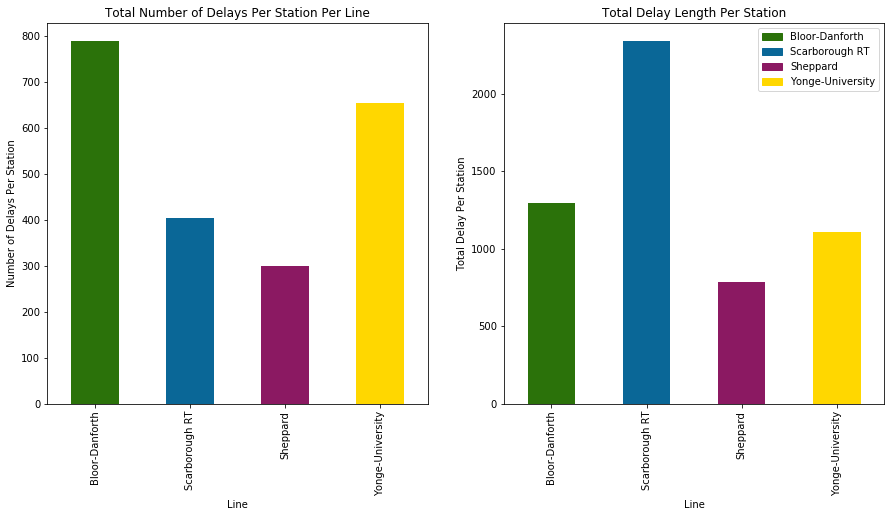

In [7]:
fix, ax = plt.subplots(1,2,figsize=(15,7))
delays_per_station.plot.bar(color=colors, title='Total Number of Delays Per Station Per Line', ax=ax[0])
ax[0].set_ylabel('Number of Delays Per Station')
total_delay_per_station.plot.bar(color=colors, title='Total Delay Length Per Station',ax=ax[1])
ax[1].set_ylabel('Total Delay Per Station')
ax[1].legend(handles=line_patches)
plt.show()

## Bound

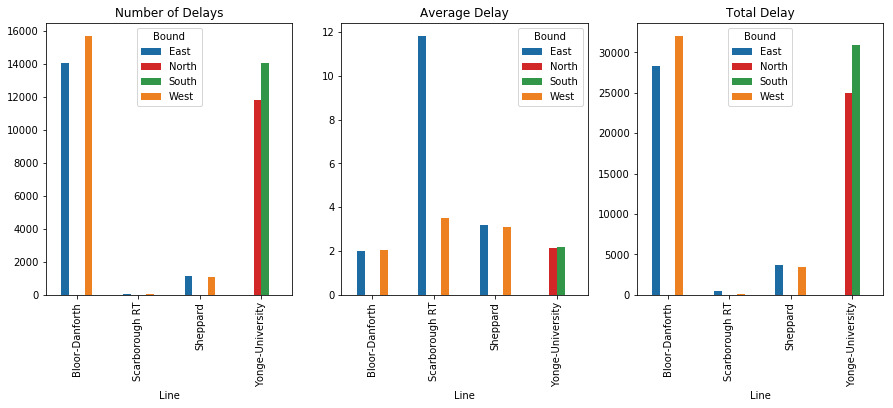

In [8]:
fix, ax = plt.subplots(1,3,figsize=(15,5))
line_bound = ttc.groupby(['Line', 'Bound'])

directions_number = line_bound.size().unstack()
directions_number.plot.bar(color=direction_colors, ax=ax[0], title='Number of Delays')

directions_average = line_bound['Min Delay'].mean().unstack()
directions_average.plot.bar(color=direction_colors, ax=ax[1], title='Average Delay')

directions_total = line_bound['Min Delay'].sum().unstack()
directions_total.plot.bar(color=direction_colors, ax=ax[2], title='Total Delay')

plt.show()

### Normalized

**YONGE** has a skew where south direction has longer and more detals
**Scarbourgh** has an extreme difference in average delay and total delay **EAST** bound

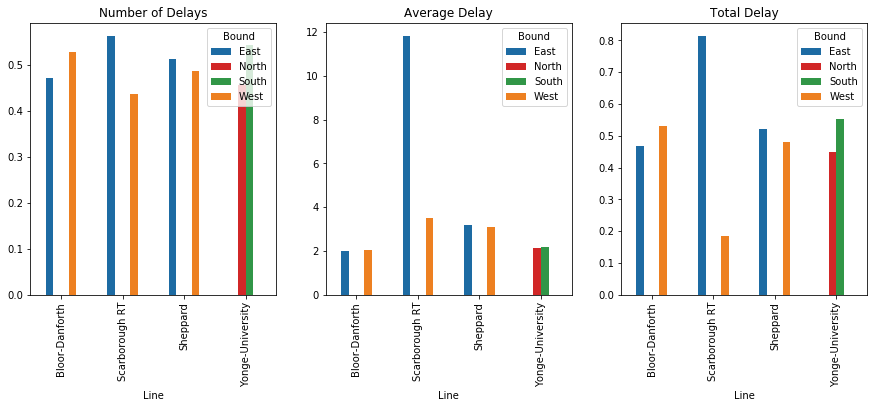

In [9]:
fix, ax = plt.subplots(1,3,figsize=(15,5))
line_bound = ttc.groupby(['Line', 'Bound'])
line_grouped = ttc[ttc['Bound'].notnull()].groupby('Line')

directions_number = (line_bound.size() / line_grouped.size()).unstack()
directions_number.plot.bar(color=direction_colors, ax=ax[0], title='Number of Delays')

directions_average = line_bound['Min Delay'].mean().unstack()
directions_average.plot.bar(color=direction_colors, ax=ax[1], title='Average Delay')

directions_total = (line_bound['Min Delay'].sum() / line_grouped['Min Delay'].sum()).unstack()
directions_total.plot.bar(color=direction_colors, ax=ax[2], title='Total Delay')

plt.show()

## Hourly Breakdown

We can seem some speak at rush hour and again at the end of the evening

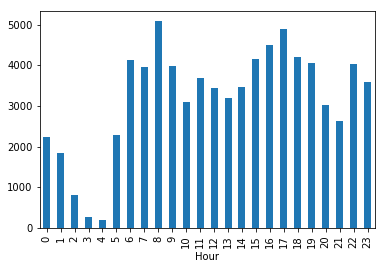

In [10]:
ttc['Hour'] = pd.to_datetime(ttc['Time'], format='%H:%M').dt.hour
ttc.groupby('Hour').size().plot.bar()
plt.show()

Lets look a the line and the time of day -- Same peaks but there is an extreme case for **Scarborough** in the morning

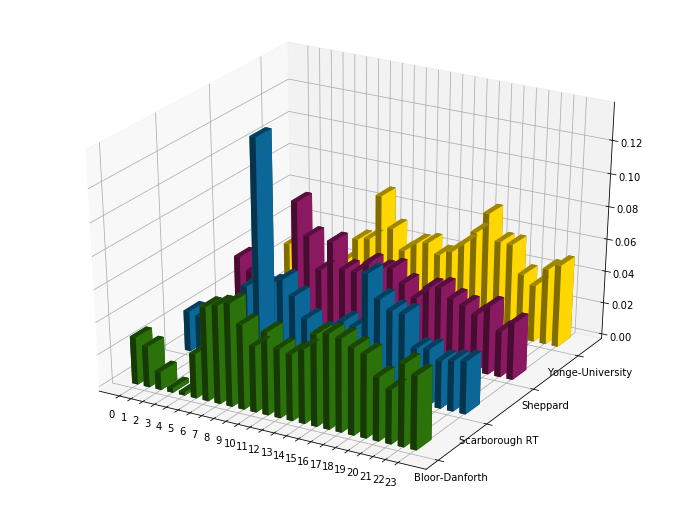

In [11]:
ct = pd.crosstab(ttc.Hour, ttc.Line, normalize='columns')
groups = ['Bloor-Danforth', 'Scarborough RT', 'Sheppard', 'Yonge-University']
plot_3d_bar(ct, groups, line_names, c=colors)

## Direction and Time of Day

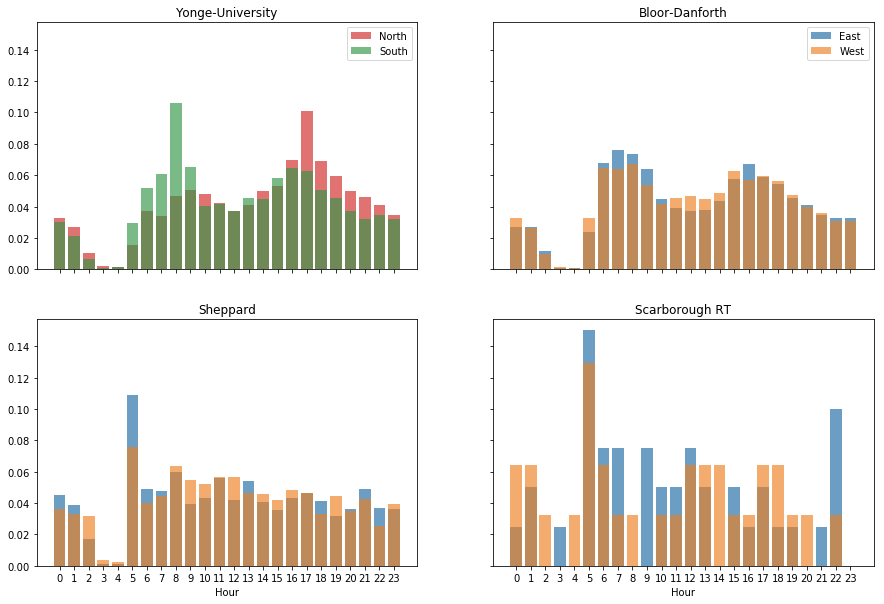

In [12]:
fig, ax = plt.subplots(2,2, figsize=(15,10), sharex=True, sharey=True)
x = np.arange(24)
yonge = ttc[ttc['Line'] == 'Yonge-University']
yonge_ns = pd.crosstab(yonge.Hour, yonge.Bound, normalize='columns')
ax[0][0].bar(x,yonge_ns['North'], color=north_color, alpha=0.65, label='North')
ax[0][0].bar(x,yonge_ns['South'], color=south_color, alpha=0.65, label='South')
ax[0][0].set_xticks(x)
ax[0][0].set_title('Yonge-University')
ax[0][0].legend()

bloor = ttc[ttc['Line'] == 'Bloor-Danforth']
bloor = pd.crosstab(bloor.Hour, bloor.Bound, normalize='columns')
ax[0][1].bar(x,bloor['East'], color=east_color, alpha=0.65, label='East')
ax[0][1].bar(x,bloor['West'], color=west_color, alpha=0.65, label='West')
ax[0][1].set_xticks(x)
ax[0][1].set_title('Bloor-Danforth')
ax[0][1].legend()

shepard = ttc[ttc['Line'] == 'Sheppard']
shepard = pd.crosstab(shepard.Hour, shepard.Bound, normalize='columns')
ax[1][0].bar(x,shepard['East'], color=east_color, alpha=0.65, label='East')
ax[1][0].bar(x,shepard['West'], color=west_color, alpha=0.65, label='West')
ax[1][0].set_xticks(x)
ax[1][0].set_title('Sheppard')
ax[1][0].set_xlabel('Hour')
ax[0][1].legend()

scarborough = ttc[ttc['Line'] == 'Scarborough RT']
scarborough = pd.crosstab(scarborough.Hour, scarborough.Bound, normalize='columns')
scarborough.loc[4] = [0,0]
ax[1][1].bar(x,scarborough['East'], color=east_color, alpha=0.65, label='East')
ax[1][1].bar(x,scarborough['West'], color=west_color, alpha=0.65, label='West')
ax[1][1].set_xticks(x)
ax[1][1].set_title('Scarborough RT')
ax[1][1].set_xlabel('Hour')
ax[0][1].legend()

plt.show()

In the **Yonge-Unversity** line you can see a clear higher number of south bond delays in the mornging and north bound delays at night

The other lines don't have as strong as a pattern but you can the morning peak for both **Sheppard** and **Scharborough** East and Northbound in the monring 